## Let's explore the data from the segmentation

### We will first load the segmentation on 1000 pieces of data for each.

### We will then apply various statistical tests & visualisations 

### We will in the end look at 100 vs 1000 & gpt-3.5 vs gpt-4 

In [3]:
# Load the data

import pandas as pd
import os

PATH = os.getcwd()

successful_dataset_name = 'finalised_segmented_profiles_successful.csv'
successful_dataset = pd.read_csv(os.path.join(PATH,'data','successful',successful_dataset_name))

unsuccessful_dataset_name = ('finalised_segmented_profiles_unsuccessful.csv')
unsuccessful_dataset = pd.read_csv(os.path.join(PATH,'data','Unsuccessful',unsuccessful_dataset_name))

In [4]:
# Review the data 
print(successful_dataset['segment'].value_counts())
print(unsuccessful_dataset['segment'].value_counts())

segment
L4    514
L3    287
L5     93
L2     83
L1     24
Name: count, dtype: int64
segment
L3    445
L4    249
L2    223
L1     75
L5      8
Name: count, dtype: int64


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Data
data = {
    "L1": [24, 75],  # Success, Failure
    "L2": [83, 223],
    "L3": [287, 445],
    "L4": [514, 249],
    "L5": [93, 8]
}

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data, index=["Success", "Failure"]).T

# Conduct Chi-Square Test
chi2, p, dof, expected = chi2_contingency(df)

print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.3f}")

Chi-Square Statistic: 288.00, p-value: 0.000


In [6]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


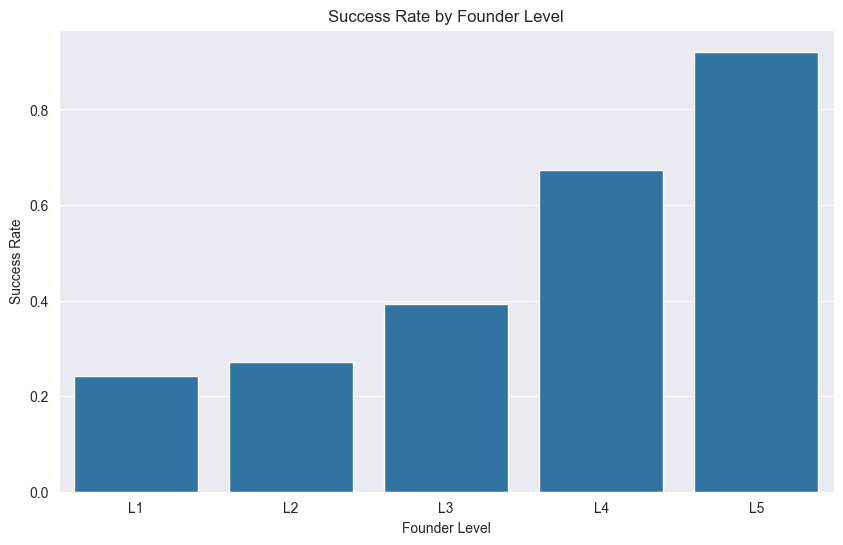

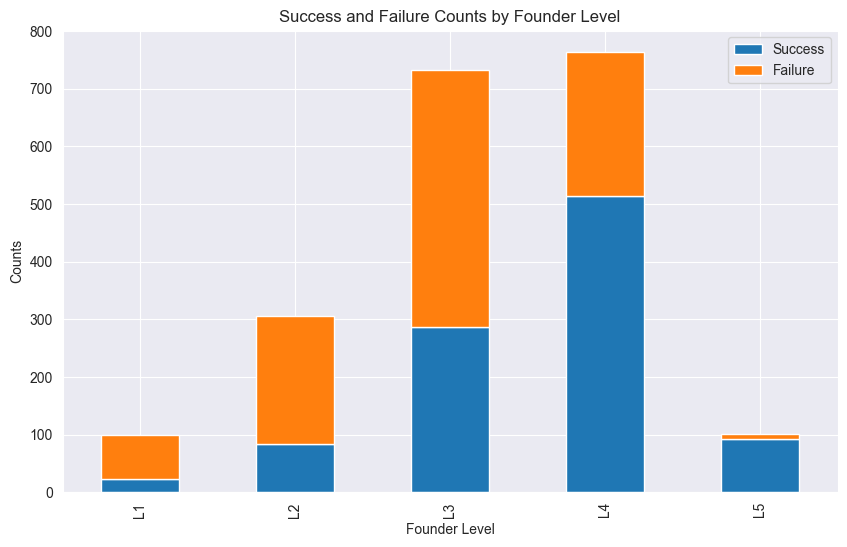

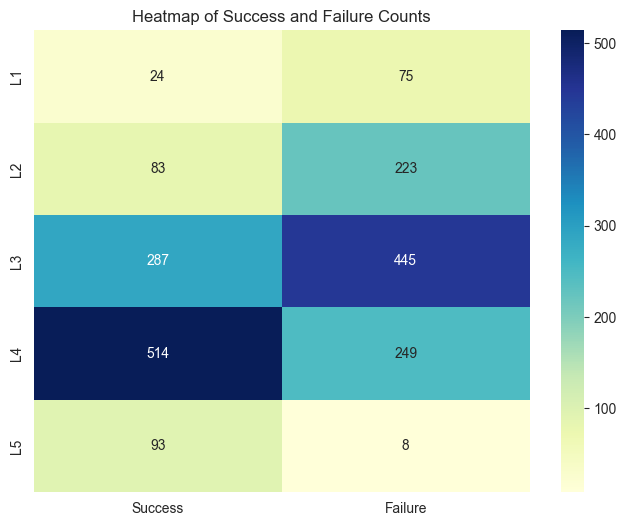

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Success Rate
df['Success Rate'] = df['Success'] / (df['Success'] + df['Failure'])

# Bar Plot for Success Rate
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='Success Rate', data=df)
plt.title('Success Rate by Founder Level')
plt.xlabel('Founder Level')
plt.ylabel('Success Rate')
plt.show()

# Stacked Bar Plot for Success vs. Failure
df[['Success', 'Failure']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Success and Failure Counts by Founder Level')
plt.xlabel('Founder Level')
plt.ylabel('Counts')
plt.show()

# Heatmap for the Contingency Table
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Success', 'Failure']], annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Success and Failure Counts')
plt.show()


In [8]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [9]:
import statsmodels.api as sm

# Prepare the data for logistic regression
df_lr = pd.get_dummies(df.index, drop_first=True).join(df['Success Rate'])
X = sm.add_constant(df_lr.drop('Success Rate', axis=1)) # Independent variables
y = df_lr['Success Rate'] # Dependent variable

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display the model summary
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

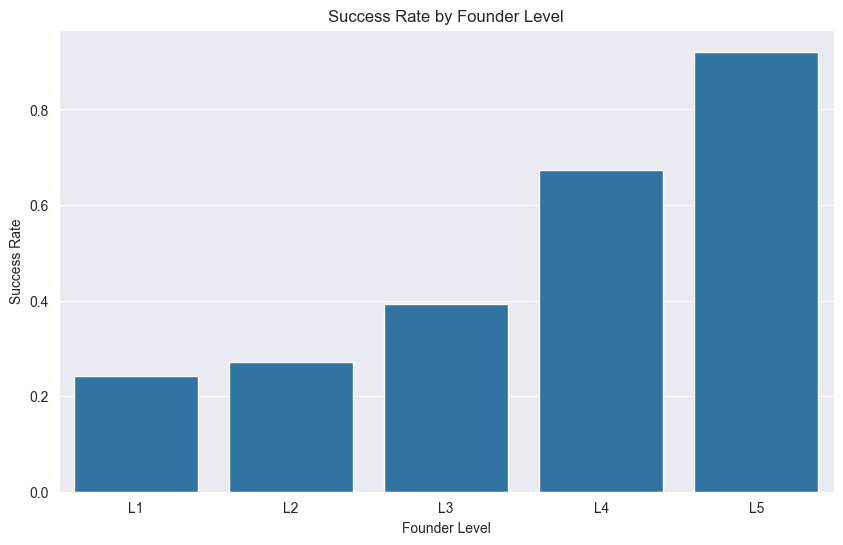

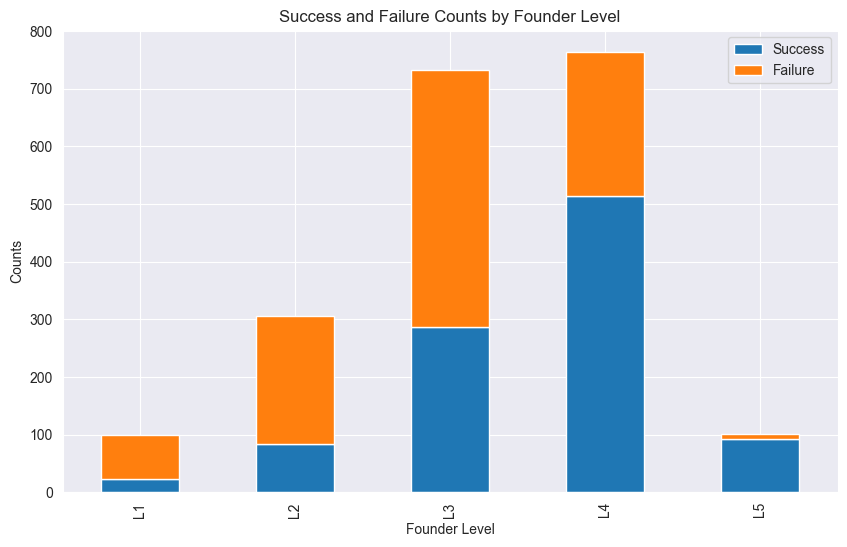

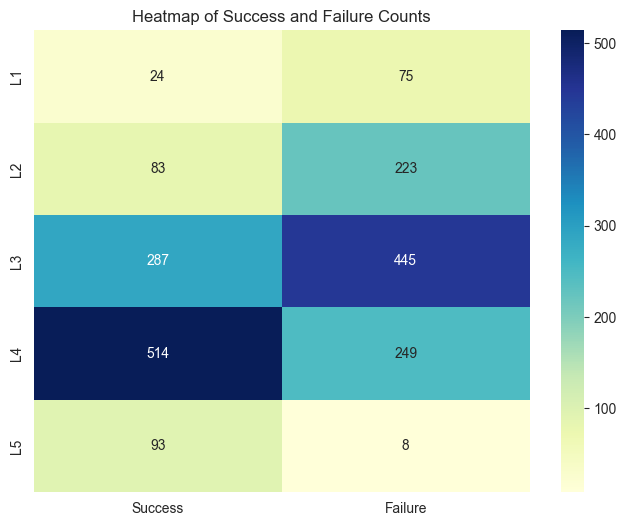

In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Directory where the plots will be saved
plot_directory = '/Users/wangxiang/Desktop/VelaInternship/plots'

# Check if the directory exists, if not, create it
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Calculate Success Rate
df['Success Rate'] = df['Success'] / (df['Success'] + df['Failure'])

# Bar Plot for Success Rate
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='Success Rate', data=df)
plt.title('Success Rate by Founder Level')
plt.xlabel('Founder Level')
plt.ylabel('Success Rate')
plt.savefig(os.path.join(plot_directory, 'success_rate_by_founder_level.png'))  # Save the figure
plt.show()

# Stacked Bar Plot for Success vs. Failure
df[['Success', 'Failure']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Success and Failure Counts by Founder Level')
plt.xlabel('Founder Level')
plt.ylabel('Counts')
plt.savefig(os.path.join(plot_directory, 'success_failure_counts_by_founder_level.png'))  # Save the figure
plt.show()

# Heatmap for the Contingency Table
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Success', 'Failure']], annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Success and Failure Counts')
plt.savefig(os.path.join(plot_directory, 'heatmap_success_failure_counts.png'))  # Save the figure
plt.show()
